# STAT207 Final Project - Predicting US or non-US Basketball Player Based on Their Record

1.   Ferdinand Ferdinand
2.   Ben Estacio
3.   Christopher Williams
4.   Sathvik Thatikonda



In [2]:
# Imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score, log_loss, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, LogisticRegression
import statsmodels.formula.api as smf

## 1. Introduction

In basketball today, teams bring in players from all over the world—125 of the 543 players on opening-night NBA rosters in 2023-24 were born outside the United States (ESPN News Services, 2023). While the global talent pool is exciting, it also means coaches and front-office staff must sort out which athletes need special visas or extra paperwork before they can suit up (Martorell et al., 2024). A quick computer tool that looks at things like a player's height, weight, and the league they came from, and flags whether they’re likely US Nationals or not, could save hours of manual checks and help everyone get on the court faster. This could help a lot for coaches and basketball talent scouts. Additionally, basketball enthusiasts and analysts may be excited to explore how nationality relates to playing style and career trajectories.

### Primary Research Goal: Building a Predictive Model That Will Effectively Predict US and non-US Basketball Players For New Datasets

### Secondary Research Goals:

In addition to making accurate predictions, the project aims to yield reliable interpretative insights into the relationships between `nationality (US or non-US)` and the chosen explanatory variables.

By examining how factors such as `height`, `weight`, `Stage`, `Games Played`, `Field Goals Made`, and `Three Points Made` contribute to the nationality of a player, we hope to uncover and describe the nature of these explanatory variables and the relationship with `nationality (US or non-US)`

## 2. Dataset Discussion

Our basketball players stats is found from Kaggle, particularly https://www.kaggle.com/datasets/jacobbaruch/basketball-players-stats-per-season-49-leagues version 10, downloaded on April 22, 2025. Based on the author of the dataset, the dataset is scraped from [Basketball Real GM](https://basketball.realgm.com/) with each row/observation representing the stats and information of a particular basketball player that played in a particular season and league from 1999-2020. This dataset is not inclusive to all type of observations as it only covers 49 leagues over the 1999–2020 period and omits other years and leagues beyond those scraped, meaning certain populations of players aren’t represented. Because of these gaps, a person using our results may want to be cautious with predicting those unrepresented leagues or seasons may have not the best results in the United States nationality predictions.

In this report, we will be using 7 out of the 34 variables in the dataset.

Our response variable is `nationality`, i.e. the nationality of the player. In the original dataset, there are many nationalities. However, as we emphasize on United States nationality predictions, we change the values in `nationality` to be either `United States` if the player has United States nationality or `Others` if the player does not have United States nationality. This way, we will be able to use a logistic model to predict whether or not a player if from the US.

Our explanatory variables are:
1.   `height_cm`: the height of the player in centimeter (cm).
2.   `weight_kg`: the weight of the player in kilograms (kg).
3.   `Stage`: the stage the player played in. The values in `Stage` are: `International`, `Regular_Season`, and `Playoffs`. (The `Regular_Season` and `Playoffs` are from the NBA league)
4.   `GP`: the number of games played by the player.
5.   `FGM`: The number of field goals made by the player.
6.   `3PM`: The number of three pointers made by the player.

The reason we choose those explanatory variables are:
1. We believe different countries tend to produce a certain average `height` and `weight`. Including both of these variables lets the model pick up on those differences.
2. We use `Stage` as it would differentiate US and non-US players distinctively. This is because the `International` games will usually have a much higher proportion of non-US players than `Regular_Season` or `Playoffs` in the NBA.
3. We use `GP`, `FGM`, and `3PM` as a measure of how experienced a player is. This may differ between US and non-US players as we may be able to see the tendency if US or non-US players are more experienced.

In [3]:
url = 'https://drive.google.com/file/d/1AwLsalpSFY-_dHIGf9EYjHoj9Jt8LGIZ/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [4]:
print(f"Rows: {df.shape[0]}")

Rows: 53949


Then, let us focus on which variables that we want to analyze, i.e. `nationality`, `height_cm`, `weight_kg`, `Stage`, `GP`, `FGM`, `3PM`

In [5]:
df = df[['nationality', 'height_cm', 'weight_kg', 'Stage', 'GP', 'FGM', '3PM']]
df.head()

,nationality,height_cm,weight_kg,Stage,GP,FGM,3PM
0,United States,216.0,147.0,Regular_Season,79,956,0
1,United States,198.0,100.0,Regular_Season,82,788,95
2,United States,206.0,120.0,Regular_Season,82,752,2
3,United States,183.0,75.0,Regular_Season,70,729,89
4,United States,193.0,82.0,Regular_Season,82,747,177


## 3. Dataset Cleaning

### 3.1. Missing Value Detection and Cleaning

First, we can try to find how many explicit missing values that we have.

In [6]:
df.isna().sum()

nationality       7
height_cm        74
weight_kg      4564
Stage             0
GP                0
FGM               0
3PM               0
dtype: int64

Based on the result above, we can infer that there are 4564 explicit missing values. Now, let us try to find the implicit missing values

In [7]:
df.dtypes

nationality     object
height_cm      float64
weight_kg      float64
Stage           object
GP               int64
FGM              int64
3PM              int64
dtype: object

Based on the result above, we can infer that there are no implicit missing values because all the data types are what we expect from the column. Now, drop the explicit missing values from the DataFrame first.

In [8]:
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

nationality    0
height_cm      0
weight_kg      0
Stage          0
GP             0
FGM            0
3PM            0
dtype: int64

In [9]:
print(f"Dropped rows = {53949 - df.shape[0]}")
print(f"Current rows = {df.shape[0]}")

Dropped rows = 4565
Current rows = 49384


### 3.2 Sample Size Cleaning

As our model wants to be used by scouts, coaches, and basketball enthusiasts, we want to make sure that our model covers all observations. However, if a unique distinct value of an explanatory categorical variable is too small, it may cause some problems in the fitting. Therefore, we will drop values of explanatory categorical variables whose number of observations is below 10.

In [10]:
df['Stage'].value_counts()

Stage
International     41751
Regular_Season     4658
Playoffs           2975
Name: count, dtype: int64

Since there are no categorical variable values whose number of observations is below 10, there are no values dropped from `Stage`.

### 3.3 Outlier Cleaning - Two Variable Outlier Inspection

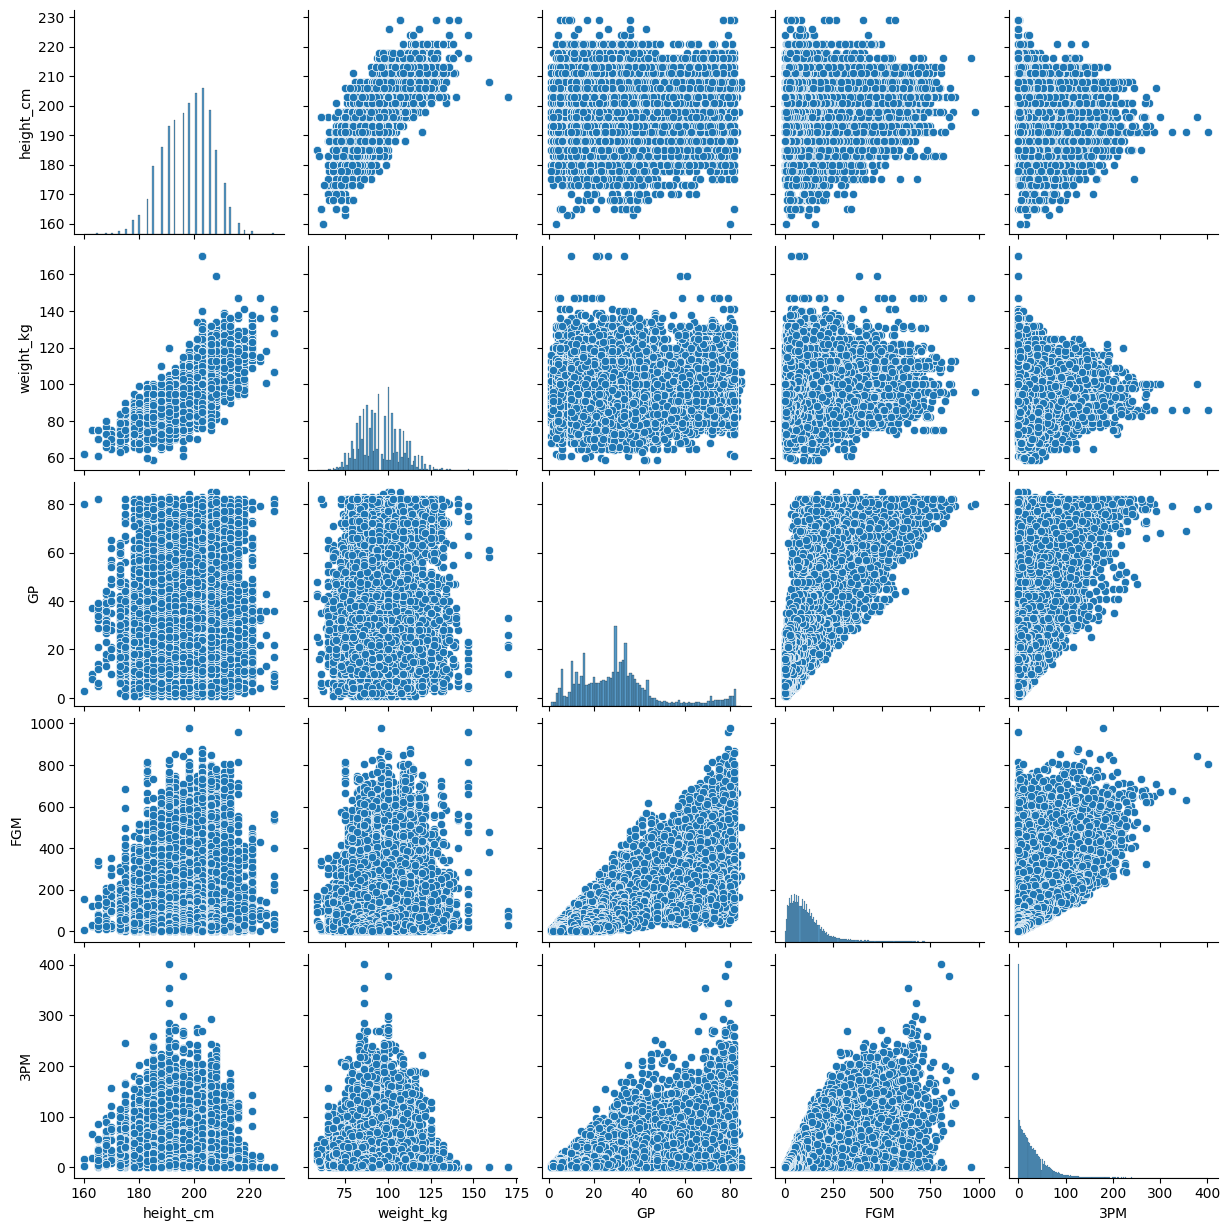

In [11]:
sns.pairplot(df[['height_cm', 'weight_kg','GP', 'FGM', '3PM']])
plt.show()

We will not be dropping any outliers as each data points has a real value. The outliers are usually real examples, such as the tallest or best players that have the best stats. Additionally, we are trying to be inclusive to all observations.

### 3.4 Other Data Cleaning

Since we are predicting whether the player is of US Nationality, we want to change our `nationality` variable after cleaning. We make a new variable called `United States`. The variable value will be `1` if it's true and `0` if it's false. Therefore, US players will be the success level in our logistic regression model.

In [12]:
df['United_States'] = df['nationality'].astype(str).apply(lambda x: 1 if 'United States' in x else 0)
df.head()

,nationality,height_cm,weight_kg,Stage,GP,FGM,3PM,United_States
0,United States,216.0,147.0,Regular_Season,79,956,0,1
1,United States,198.0,100.0,Regular_Season,82,788,95,1
2,United States,206.0,120.0,Regular_Season,82,752,2,1
3,United States,183.0,75.0,Regular_Season,70,729,89,1
4,United States,193.0,82.0,Regular_Season,82,747,177,1


To make analysis and plotting easier, we also change the variable called `nationality` such that the variable value will be `United States` if the player's nationality is United States and `Others` if the player's nationality is not United States.

In [13]:
df['nationality'] = df['nationality'].astype(str).apply(lambda x: 'United States' if 'United States' in x else 'Others')
df.head()

,nationality,height_cm,weight_kg,Stage,GP,FGM,3PM,United_States
0,United States,216.0,147.0,Regular_Season,79,956,0,1
1,United States,198.0,100.0,Regular_Season,82,788,95,1
2,United States,206.0,120.0,Regular_Season,82,752,2,1
3,United States,183.0,75.0,Regular_Season,70,729,89,1
4,United States,193.0,82.0,Regular_Season,82,747,177,1


## 4. Preliminary Analysis

### 4.1 Relationships between the Response Variable and the Explanatory Variables

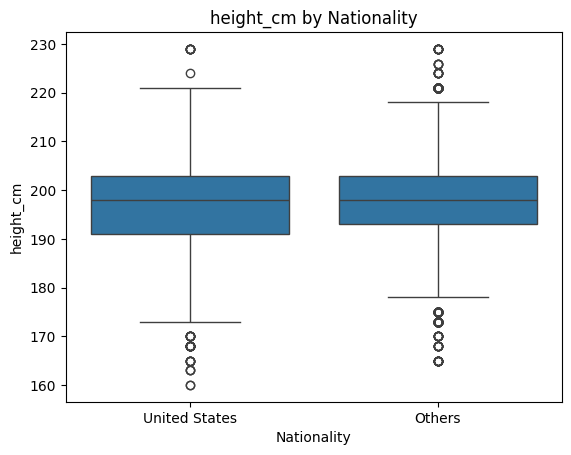

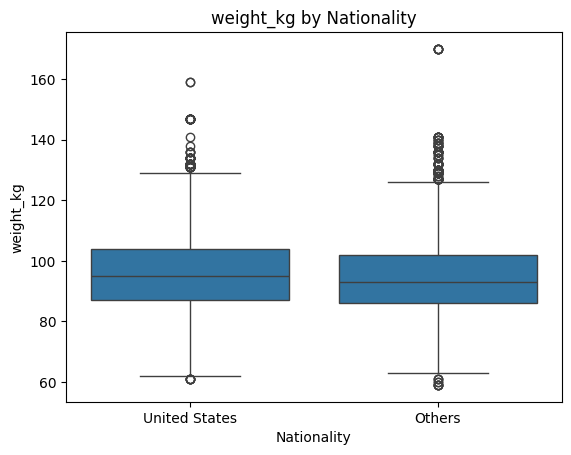

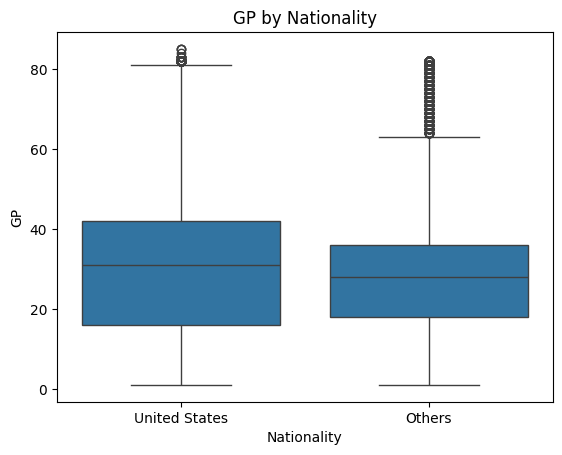

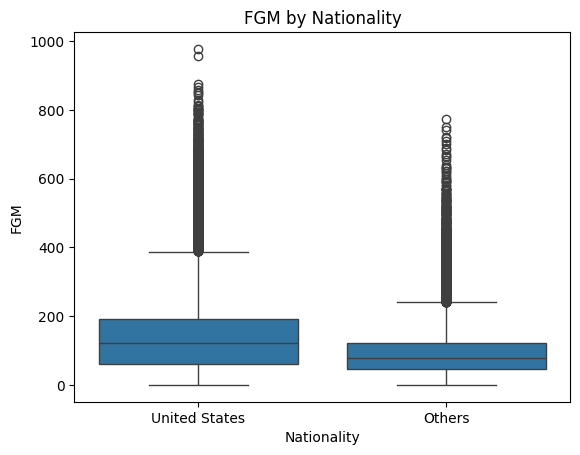

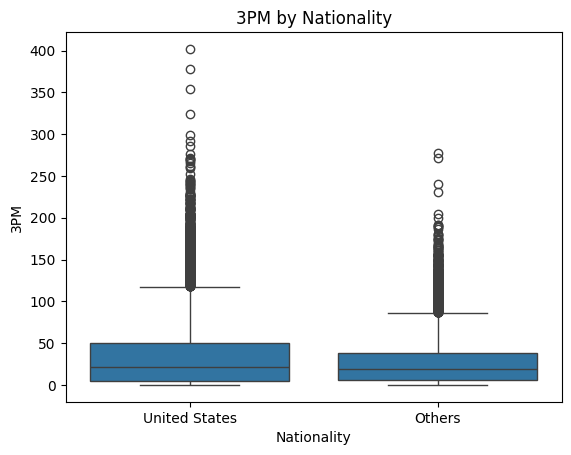

In [14]:
for var in ['height_cm','weight_kg','GP','FGM','3PM']:
    plt.figure()
    sns.boxplot(x='nationality', y=var, data=df)
    plt.title(f"{var} by Nationality")
    plt.xlabel('Nationality')
    plt.ylabel(var)
    plt.show()

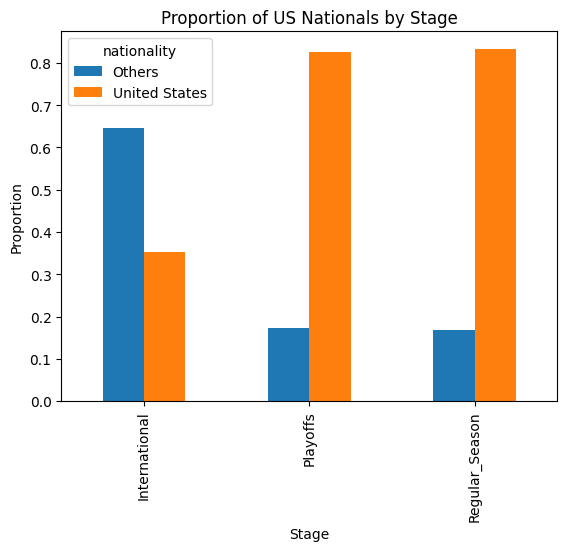

In [15]:
pd.crosstab(df['Stage'], df['nationality'], normalize='index').plot.bar()
plt.title('Proportion of US Nationals by Stage')
plt.ylabel('Proportion')
plt.xlabel('Stage')
plt.show()

After visualizing each explanatory variable against the response variable (`nationality`) using boxplots for numerical variables and a barplot for the categorical variable, we found that the variable `Stage` had the strongest relationship. The proportion of US players is highest in the `Regular_Season` and `Playoffs` stages, while `International` games had a much higher proportion of non-US players. The variable `FGM` (Field Goals Made) also shows a moderate relationship, with non-US players tending to have slightly higher values. On the other hand, `height_cm` exhibits a weak relationship with `nationality`, as the distributions for US and non-US players overlap significantly, and their medians are nearly identical. Variables such as `GP` (Games Played) and `3PM` (3-Point Made) also show weaker relationships with `nationality`, as their distributions overlap considerably for both US and non-US players.

### 4.2 Relationships between Explanatory Variable Pairs

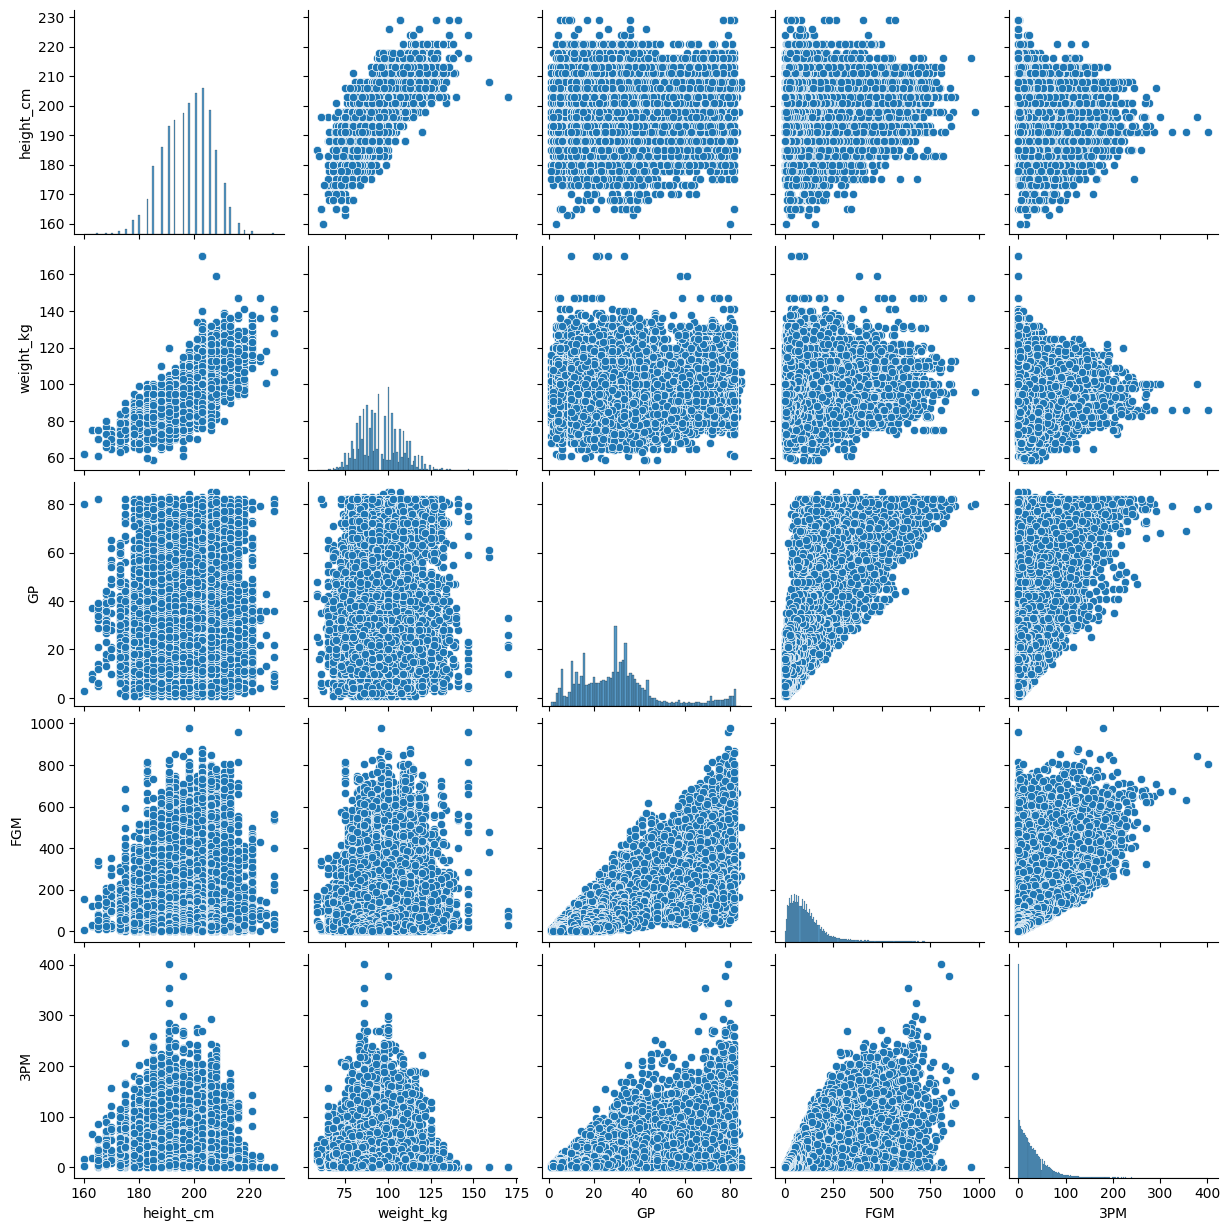

In [16]:
sns.pairplot(df[['height_cm', 'weight_kg','GP', 'FGM', '3PM']])
plt.show()

In [17]:
df[['height_cm', 'weight_kg','GP', 'FGM', '3PM']].corr()

,height_cm,weight_kg,GP,FGM,3PM
height_cm,1.000000,0.798795,0.042301,0.071223,-0.293136
weight_kg,0.798795,1.000000,0.070043,0.120471,-0.272414
GP,0.042301,0.070043,1.000000,0.771412,0.500751
FGM,0.071223,0.120471,0.771412,1.000000,0.555199
3PM,-0.293136,-0.272414,0.500751,0.555199,1.000000


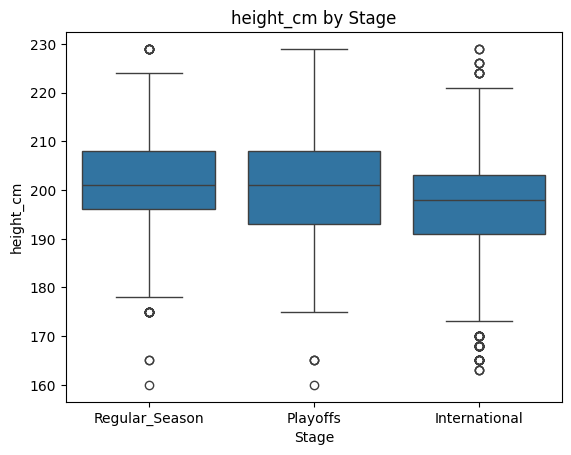

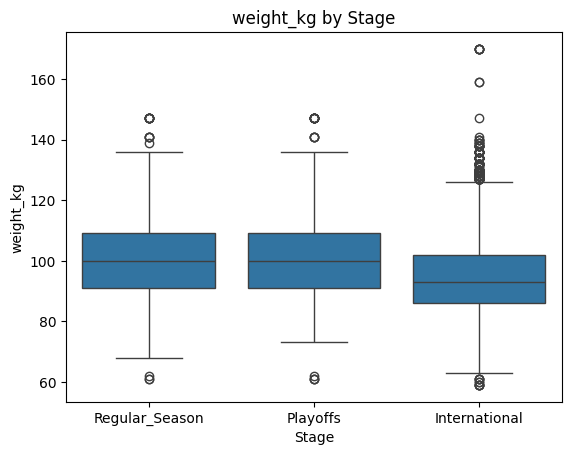

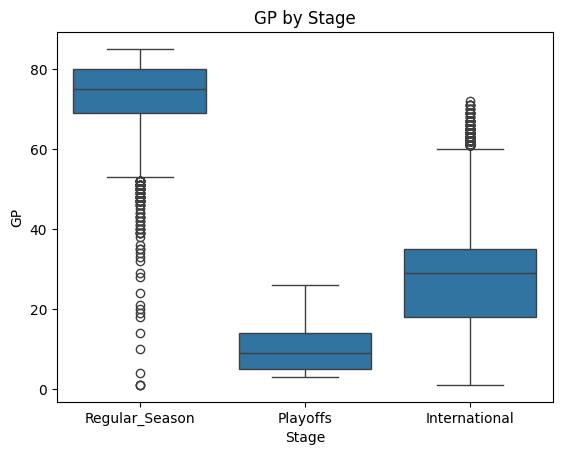

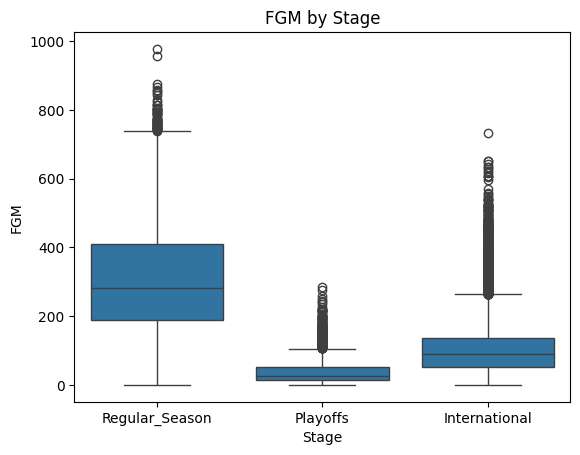

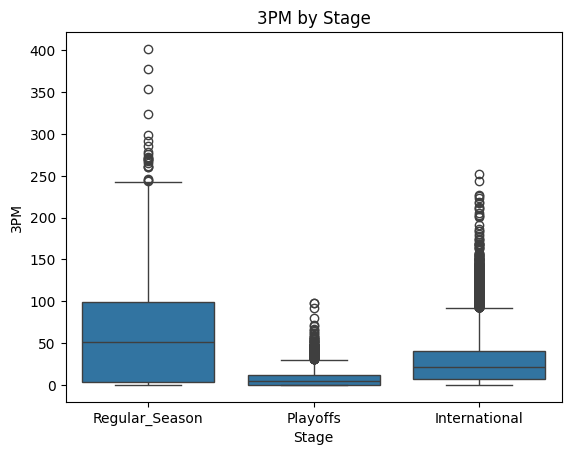

In [18]:
for var in ['height_cm','weight_kg','GP','FGM','3PM']:
    plt.figure()
    sns.boxplot(x='Stage', y=var, data=df)
    plt.title(f"{var} by Stage")
    plt.xlabel('Stage')
    plt.ylabel(var)
    plt.show()

We visualized relationships between numerical explanatory variables using a pairplot and calculated the correlation matrix. Notably, there are strong associations between the variables `FGM` and `GP` (r = 0.77), indicating that players who played more games also tended to make more field goals. Additionally, `height_cm` and `weight_kg` are highly correlated (r = 0.80), as expected. There is a moderate correlation between `FGM` and `3PM` (r = 0.56), and a noticeable negative relationship between `height_cm` and `3PM` (r = -0.29), suggesting that shorter players tend to make more 3-pointers. Furthermore, we observed that the variable `Stage` is associated with several numerical variables. For instance, players in the `International` stage tend to have different distributions in `FGM`, `GP`, and `3PM` compared to those in the `Regular_Season` and `Playoffs` stages. These associations may affect multicollinearity in later modeling steps.

### 4.3 Interaction Effects

<Figure size 640x480 with 0 Axes>

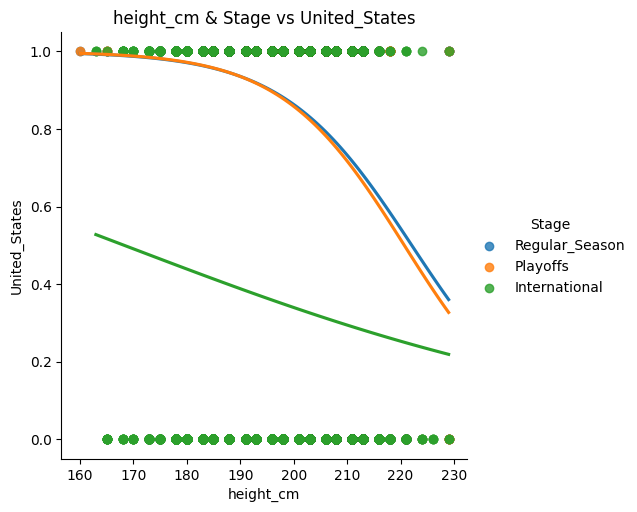

<Figure size 640x480 with 0 Axes>

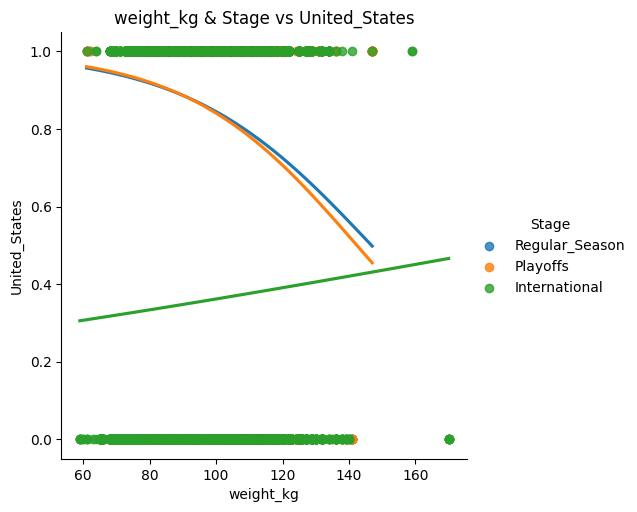

<Figure size 640x480 with 0 Axes>

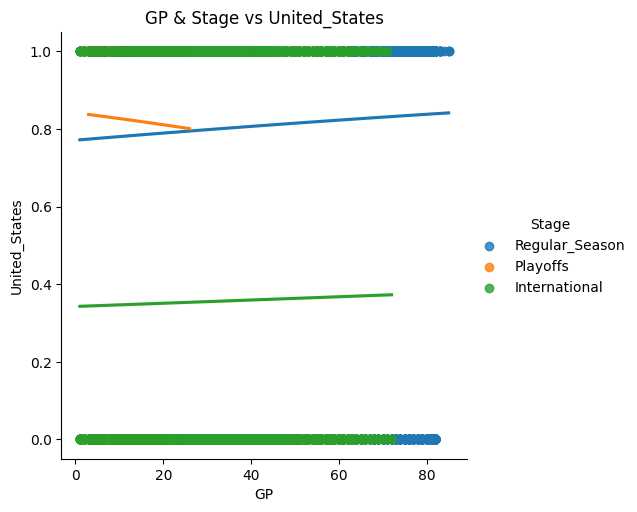

<Figure size 640x480 with 0 Axes>

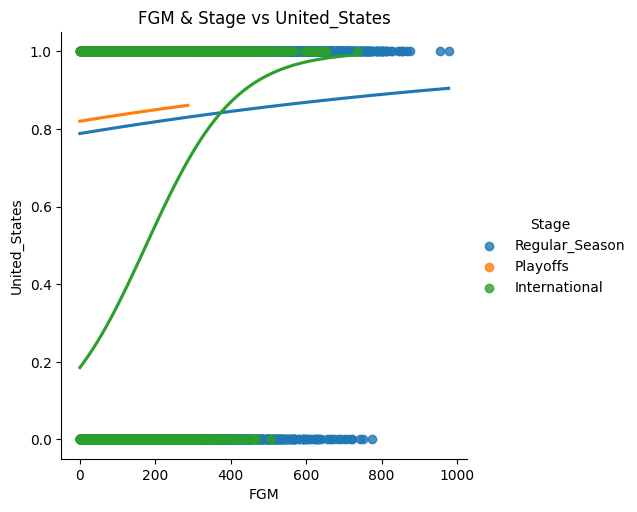

<Figure size 640x480 with 0 Axes>

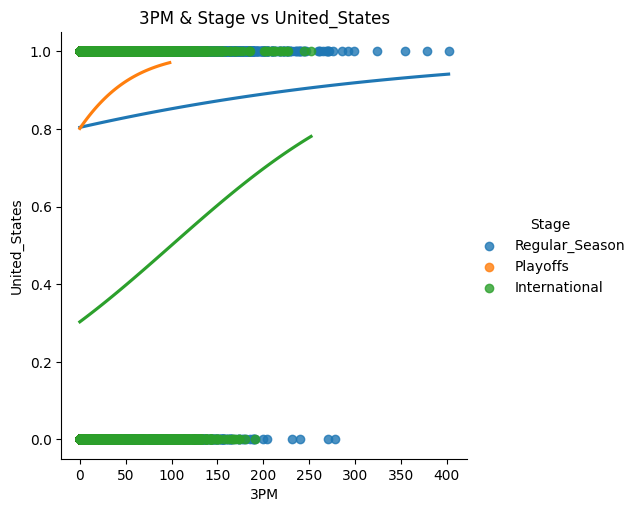

In [19]:
for var in ['height_cm','weight_kg','GP','FGM','3PM']:
    plt.figure()
    sns.lmplot(x=var, y='United_States', hue='Stage', logistic=True, ci=False, data=df)
    plt.title(f"{var} & Stage vs United_States")
    plt.xlabel(f'{var}')
    plt.ylabel('United_States')
    plt.show()

Based on the interaction plots, all the numerical explanatory variables (i.e. `height_cm`,`weight_kg`,`GP`,`FGM`, and `3PM`) and `Stage` have an interaction that impacted the predicted response variable `nationality` (or `United_states`). This is because all of them have different stretch/slope.

## 5. Model Data Preprocessing

### 5.1 Features Matrix and Target Array

In [20]:
features = ['height_cm', 'weight_kg', 'Stage', 'GP', 'FGM', '3PM']
target = 'United_States'

X = df[features]
y = df[target]

### 5.2 Explantory Variable Scaling

In [21]:
numerical_columns = ['height_cm', 'weight_kg', 'GP', 'FGM', '3PM']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_columns]), columns=numerical_columns)
X_scaled

,height_cm,weight_kg,GP,FGM,3PM
0,2.098932,4.352114,2.640326,8.163748,-0.926620
1,0.026080,0.386253,2.804373,6.528742,2.100882
2,0.947348,2.073853,2.804373,6.178384,-0.862883
3,-1.701297,-1.723248,2.148183,5.954543,1.909671
4,-0.549712,-1.132588,2.804373,6.129723,4.714094
...,...,...,...,...,...
49379,0.026080,-1.048208,-0.859354,-1.072091,-0.862883
49380,-0.780029,-0.879448,-1.132766,-1.091555,-0.799147
49381,-1.125505,-0.373168,-0.804671,-1.130484,-0.926620
49382,-1.125505,-1.470108,-1.023401,-1.140216,-0.926620


### 5.3 Indicator Variables

In [22]:
Xcat = pd.get_dummies(X['Stage'], drop_first=True, dtype=int)
# This is for analysis in Section 7
X = pd.concat([X.drop('Stage', axis=1), Xcat], axis=1)
X = X.rename(columns={'Regular_Season': 'Stage_Regular_Season', 'Playoffs': 'Stage_Playoffs'})
X

,height_cm,weight_kg,GP,FGM,3PM,Stage_Playoffs,Stage_Regular_Season
0,216.0,147.0,79,956,0,0,1
1,198.0,100.0,82,788,95,0,1
2,206.0,120.0,82,752,2,0,1
3,183.0,75.0,70,729,89,0,1
4,193.0,82.0,82,747,177,0,1
...,...,...,...,...,...,...,...
49379,198.0,83.0,15,7,2,0,0
49380,191.0,85.0,10,5,4,0,0
49381,188.0,91.0,16,1,0,0,0
49382,188.0,78.0,12,0,0,0,0


In [23]:
X_scaled = pd.concat([X_scaled, Xcat], axis=1)
X_scaled = X_scaled.rename(columns={'Regular_Season': 'Stage_Regular_Season', 'Playoffs': 'Stage_Playoffs'})
X_scaled

,height_cm,weight_kg,GP,FGM,3PM,Stage_Playoffs,Stage_Regular_Season
0,2.098932,4.352114,2.640326,8.163748,-0.926620,0,1
1,0.026080,0.386253,2.804373,6.528742,2.100882,0,1
2,0.947348,2.073853,2.804373,6.178384,-0.862883,0,1
3,-1.701297,-1.723248,2.148183,5.954543,1.909671,0,1
4,-0.549712,-1.132588,2.804373,6.129723,4.714094,0,1
...,...,...,...,...,...,...,...
49379,0.026080,-1.048208,-0.859354,-1.072091,-0.862883,0,0
49380,-0.780029,-0.879448,-1.132766,-1.091555,-0.799147,0,0
49381,-1.125505,-0.373168,-0.804671,-1.130484,-0.926620,0,0
49382,-1.125505,-1.470108,-1.023401,-1.140216,-0.926620,0,0


## 6. Feature Selection with k-Fold Cross-Validation

We will be using OPTION C: Regularization with Cross-Validation with all LASSO, Ridge Regression, and Elastic Net regularization; we will fit all three models and see which one performs the best. To better test the performance of our models, we will use k-fold cross-validation with k=5 folds instead of a single train/test split. To find the best possible model, we will test each of the three types of models with many different lambda values to find the model with the highest average test AUC.

In [24]:
lambda_values = np.linspace(0.001, 50, 500)
crossval = KFold(n_splits=5, shuffle=True, random_state=225)

### 6.1 LASSO Regularization with Cross-Validation

In [25]:
lasso_auc = []

for value in lambda_values:
    lasso_log_mod = LogisticRegression(penalty='l1', C=1/value, solver='liblinear', max_iter=10000)
    auc = cross_val_score(lasso_log_mod, X_scaled, y, cv=crossval, scoring='roc_auc').mean()
    lasso_auc.append(auc)

lasso_auc = np.array(lasso_auc)

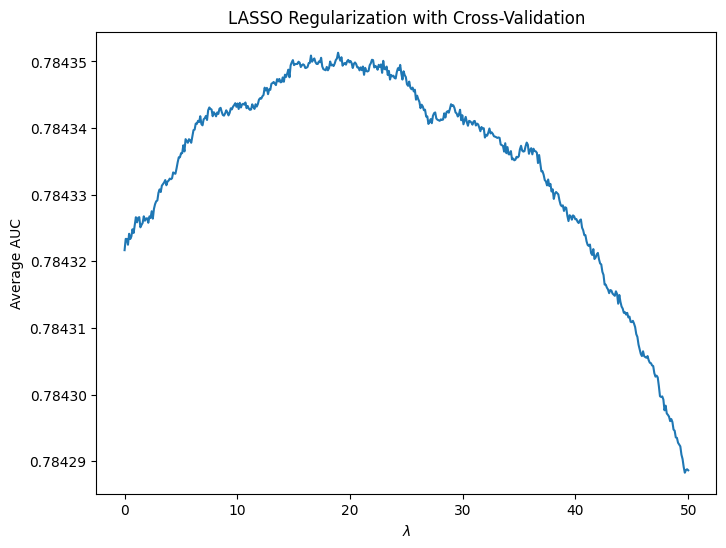

In [26]:
plt.figure(figsize=(8,6))
plt.plot(lambda_values, lasso_auc)
plt.xlabel(r'$\lambda$')
plt.ylabel('Average AUC')
plt.title('LASSO Regularization with Cross-Validation')
plt.show()

In [27]:
max_lasso_auc = lasso_auc[np.argmax(lasso_auc)]
max_lambda_lasso_auc = lambda_values[np.argmax(lasso_auc)]
print(f"Maximum AUC: {max_lasso_auc}")
print(f"Corresponding lambda: {max_lambda_lasso_auc}")

Maximum AUC: 0.7843513069417813
Corresponding lambda: 18.93849699398798


### 6.2 Ridge Regression Regularization with Cross-Validation

In [28]:
ridge_auc = []

for value in lambda_values:
    ridge_log_mod = LogisticRegression(penalty='l2', C=1/value, solver='liblinear', max_iter=10000)
    auc = cross_val_score(ridge_log_mod, X_scaled, y, cv=crossval, scoring='roc_auc').mean()
    ridge_auc.append(auc)

ridge_auc = np.array(ridge_auc)

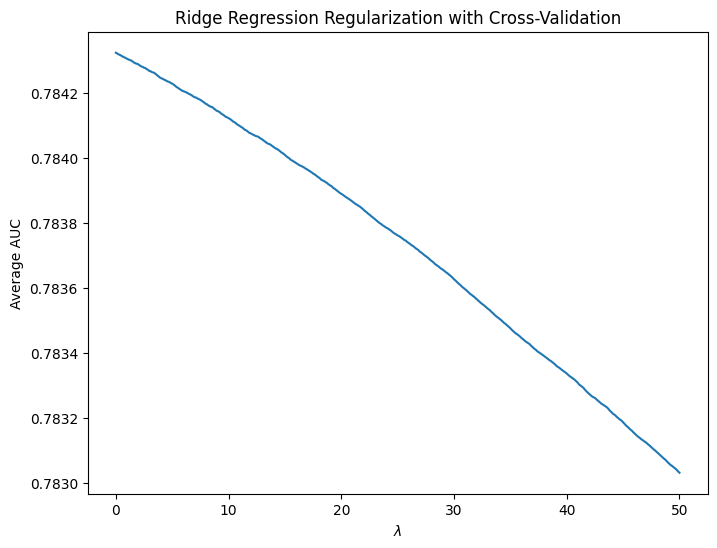

In [29]:
plt.figure(figsize=(8,6))
plt.plot(lambda_values, ridge_auc)
plt.xlabel(r'$\lambda$')
plt.ylabel('Average AUC')
plt.title('Ridge Regression Regularization with Cross-Validation')
plt.show()

In [30]:
max_ridge_auc = ridge_auc[np.argmax(ridge_auc)]
max_lambda_ridge_auc = lambda_values[np.argmax(ridge_auc)]
print(f"Maximum AUC: {max_ridge_auc}")
print(f"Corresponding lambda: {max_lambda_ridge_auc}")

Maximum AUC: 0.7843227404414822
Corresponding lambda: 0.001


### 6.3 Elastic Net Regularization with Cross-Validation

We will use $\alpha = 0.5$ so that both LASSO and Ridge Regression terms influence the penalty and balance the Elastic Net.

In [31]:
elastic_net_auc = []

for value in lambda_values:
    elastic_net_log_mod = LogisticRegression(penalty='elasticnet', C=1/value, solver='saga', l1_ratio=0.5, max_iter=10000)
    auc = cross_val_score(elastic_net_log_mod, X_scaled, y, cv=crossval, scoring='roc_auc').mean()
    elastic_net_auc.append(auc)

elastic_net_auc = np.array(elastic_net_auc)

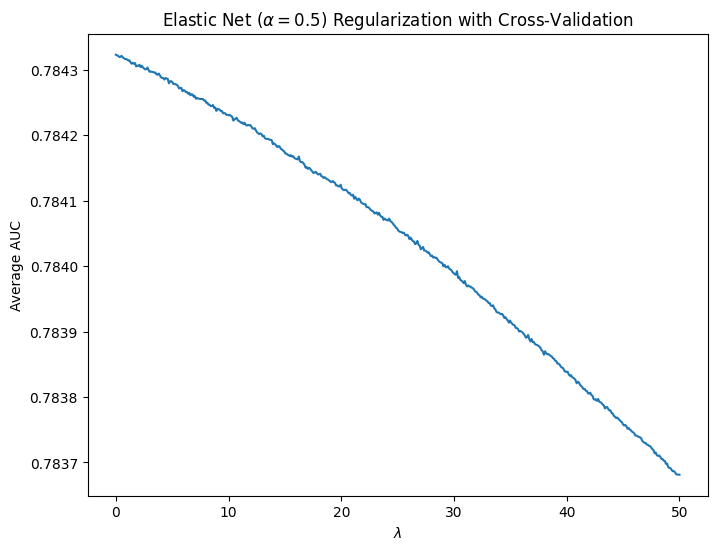

In [32]:
plt.figure(figsize=(8,6))
plt.plot(lambda_values, elastic_net_auc)
plt.xlabel(r'$\lambda$')
plt.ylabel('Average AUC')
plt.title(r'Elastic Net ($\alpha = 0.5$) Regularization with Cross-Validation')
plt.show()

In [33]:
max_elastic_net_auc = elastic_net_auc[np.argmax(elastic_net_auc)]
max_lambda_elastic_net_auc = lambda_values[np.argmax(elastic_net_auc)]
print(f"Maximum AUC: {max_elastic_net_auc}")
print(f"Corresponding lambda: {max_lambda_elastic_net_auc}")

Maximum AUC: 0.7843229579719516
Corresponding lambda: 0.001


### 6.4 Best Model

In [34]:
max_auc_scores = [max_lasso_auc, max_ridge_auc, max_elastic_net_auc]
max_auc = np.max(max_auc_scores)
which_max = {0: 'lasso', 1: 'ridge', 2: 'elastic net'}[np.argmax(max_auc_scores)]
which_lambda_max = {0: max_lambda_lasso_auc, 1: max_lambda_ridge_auc, 2: max_lambda_elastic_net_auc}[np.argmax(max_auc_scores)]
print(f"The best model is {which_max} regularization with average AUC of {max_auc} with lambda = {which_lambda_max}")

The best model is lasso regularization with average AUC of 0.7843513069417813 with lambda = 18.93849699398798


## 7. Best Model Discussion

### 7.1. Train-Test-Split

In [35]:
df_new = pd.concat([X, y], axis=1)
df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=225)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
features = ['height_cm', 'weight_kg', 'Stage_Regular_Season', 'Stage_Playoffs', 'GP', 'FGM', '3PM']
target = 'United_States'
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

In [46]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_train_scaled = pd.concat([X_train_scaled, X_train.drop(numerical_columns, axis=1)], axis=1)
X_train_scaled

,height_cm,weight_kg,GP,FGM,3PM,Stage_Regular_Season,Stage_Playoffs
0,0.028200,0.387313,-0.039538,0.075465,-0.516086,0,0
1,-0.202511,0.387313,-1.025344,-0.714553,-0.579789,0,0
2,-0.202511,-0.458288,-0.149072,-0.529240,0.184644,0,0
3,0.604977,0.387313,-0.532441,-0.568253,0.057238,0,0
4,0.374267,-0.204608,-1.573015,-1.124191,-0.930153,0,0
...,...,...,...,...,...,...,...
39502,0.374267,1.063794,-0.368140,0.065711,-0.006464,0,0
39503,0.951044,0.049073,-0.039538,-0.168368,-0.324978,0,0
39504,-0.202511,-0.120048,1.274871,0.982521,2.318684,0,0
39505,0.374267,0.387313,0.069997,-0.207381,0.120941,0,0


In [38]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.concat([X_test_scaled, X_test.drop(numerical_columns, axis=1)], axis=1)
X_test_scaled

,height_cm,weight_kg,GP,FGM,3PM,Stage_Regular_Season,Stage_Playoffs
0,-0.202511,-0.627408,-0.696742,-0.617020,-0.388680,0,0
1,-0.548577,-1.303889,1.329638,-0.392694,0.726117,0,0
2,-0.548577,-1.050209,0.562900,0.270531,0.089090,0,0
3,0.604977,0.725554,-0.806276,-0.578006,-0.165721,0,0
4,-0.202511,0.894674,-0.039538,0.446090,0.885373,0,0
...,...,...,...,...,...,...,...
9872,0.951044,0.725554,0.015229,0.816715,-0.930153,0,0
9873,-0.779288,-1.219329,2.424979,3.050220,2.063873,1,0
9874,-1.125354,-0.965649,-0.532441,-0.343927,-0.070167,0,0
9875,-1.471421,-1.219329,-1.408714,-1.026658,-0.707194,0,0


### 7.2 Fit the Chosen Model

In [39]:
lambda_best = which_lambda_max
lasso_log_mod = LogisticRegression(penalty='l1', C=1/lambda_best, solver='liblinear', max_iter=10000, random_state=225)
lasso_log_mod.fit(X_train_scaled, y_train)

LogisticRegression(C=np.float64(0.05280250065870854), max_iter=10000,
                   penalty='l1', random_state=225, solver='liblinear')

### 7.3 Equation

In [40]:
X_train_scaled.columns

Index(['height_cm', 'weight_kg', 'GP', 'FGM', '3PM', 'Stage_Regular_Season',
       'Stage_Playoffs'],
      dtype='object')

In [41]:
print(f"Intercept: {lasso_log_mod.intercept_[0]}")
print(f"Coefficient: {lasso_log_mod.coef_[0]}")

Intercept: -0.6023011499778075
Coefficient: [-0.66652621  0.45436068 -0.90707676  1.33260178 -0.07142496  2.76509092
  2.17178688]


The probability equation to our Logistic Regression model is
\begin{align*}
    \hat{p} &= \frac{1}{
        1 + \exp \left(-
            \begin{align*}
                &-0.6022319835214505\\
                &-0.66642531 \ \hat{\text{height_cm}} \\
                &+0.45430306 \ \hat{\text{weight_kg}} \\
                &-0.90685861 \ \hat{\rm GP} \\
                &+1.33240012\ \hat{\rm FGM} \\
                &-0.07138923 \ \hat{\rm 3PM} \\
                &+2.76440907 \ \hat{\text{Stage}_{\text{Regular Season}}} \\
                &+2.17150374 \ \hat{\text{Stage}_{\rm Playoffs}}
            \end{align*}
        \right)
    }
\end{align*}

### 7.4 Multicollinearity

In [42]:
X_train_scaled[numerical_columns].corr()

,height_cm,weight_kg,GP,FGM,3PM
height_cm,1.000000,0.798868,0.040808,0.072077,-0.291305
weight_kg,0.798868,1.000000,0.067185,0.119424,-0.272205
GP,0.040808,0.067185,1.000000,0.770940,0.501733
FGM,0.072077,0.119424,0.770940,1.000000,0.555433
3PM,-0.291305,-0.272205,0.501733,0.555433,1.000000


As there are pairs of numerical explanatory variables that have a strong linear relationship with each other (correlation > .7), our model has an issue with multicollinearity. The pairs of numerical explanatory variables are `weight_kg and height_cm` and `FGM and GP`

### 7.5 Slope Interpretations

Due to multicollinearity, we cannot make interpret the magnitudes of the slopes as how important the corresponding explanatory variable is when predicting your response variable in a logistic regression model. This is because multicollinearity may inflate the slopes of some of the variables and mislead our interpretation.

### 7.6 Overfitting Explanatory Variables

As none of the slopes are zeroed out by the best lasso regularization model, we can safely say that there are no overfitting variables in our best model.

### 7.7 Test ROC and AUC

AUC Score: 0.7857783654947945


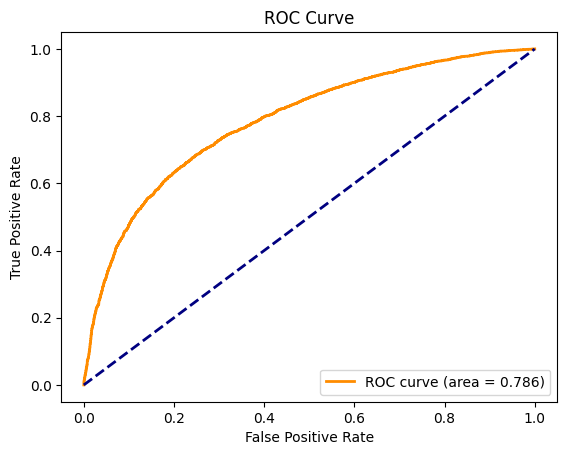

In [43]:
y_prob = lasso_log_mod.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc}")

def plot_roc(fpr, tpr, auc_value, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = ' + str(round(auc_value, 3)) + ')')
    # Plot the baseline "no skill" line
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc(fpr, tpr, auc)

The ROC curve and the AUC of around 0.786 indicates our best logistic regression model shows decent performance and can somewhat reliably distinguish between US and non-US players in the test dataset.

### 7.8 Best Predictive Probability Threshold

As our research goal is primarily to help staff/coaches in scouting players, there are more costs in misclassifying non-US players as US players because non-US players would need a lot more paperwork (e.g., visas and sponsorship). On the other hand, there is less of a downside to misclassifying US players as international players, as they would just simply not need the paperwork. Because of this, we would want to minimize the False Positive Rate (FPR) even if we have a lower True Positive Rate (TPR). For this report, we want to have the maximum FPR to be around 25%.

In [44]:
df_tpr_fpr = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
df_tpr_fpr


,fpr,tpr,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.000239,0.999974
2,0.000000,0.003592,0.999485
3,0.000175,0.003592,0.999477
4,0.000175,0.007184,0.998974
...,...,...,...
3686,0.995615,0.999521,0.088071
3687,0.995615,0.999761,0.087869
3688,0.997895,0.999761,0.078688
3689,0.997895,1.000000,0.076023


In [45]:
# Set a maximum FPR
max_fpr = 0.25

# Find index of the threshold with lowest FPR but also have largest TPR
best_threshold_index = np.argmax(df_tpr_fpr[df_tpr_fpr['fpr'] <= target_fpr]['tpr'])

# Get the best FPR, TPR, threshold value
best_threshold = df_tpr_fpr['thresholds'][best_threshold_index]
best_fpr = df_tpr_fpr['fpr'][best_threshold_index]
best_tpr = df_tpr_fpr['tpr'][best_threshold_index]


print(f"Best Threshold = {best_threshold} with FPR = {best_fpr} and TPR = {best_tpr}")

NameError: name 'target_fpr' is not defined

For FPR at 25%, the best probability threshold is around 0.397, yielding a FPR of 25.0% and a TPR of 68.5%. In terms of our analysis, this means that 25% of non-US basketball players will mistakenly be classified as from the US and 68.5% of actual US basketball players will be correctly classified as such.

## 8. Additional Analysis/Insight

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver = 'adam', max_iter=500)
mlp.fit(X_train_scaled, y_train)
pred_y = mlp.predict(X_test_scaled)

y_prob = mlp.predict_proba(X_test_scaled)
y_prob_df = pd.DataFrame(y_prob, columns=['prob_not_us', 'prob_us'])



In [54]:
y_prob_df.head()

,prob_not_us,prob_us
0,0.822049,0.177951
1,0.946808,0.053192
2,0.724564,0.275436
3,0.638508,0.361492
4,0.279722,0.720278


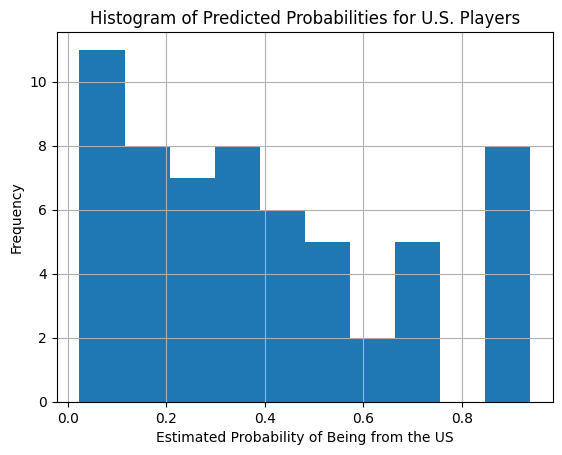

In [56]:
y_prob_df.iloc[0:60, 1].hist()
plt.xlabel('Estimated Probability of Being from the US')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities for U.S. Players')
plt.show()

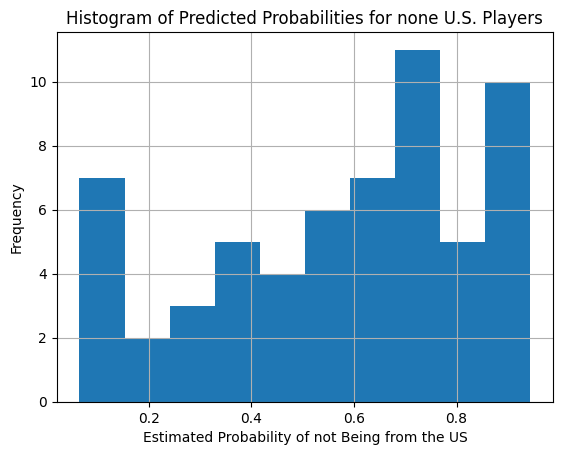

In [57]:
y_prob_df.iloc[60:120, 0].hist()
plt.xlabel('Estimated Probability of not Being from the US')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities for none U.S. Players')
plt.show()

looking at the two bar charts, we see that most real U.S. players get scores close to 0, the model mistakenly thinks they’re not American. Meanwhile, non-U.S. players get scores closer to 1 for “not being from the U.S.,” showing that the model is more confident there. This suggests the model struggles to identify actual U.S. players correctly, and is of one of the weaker models here.

## 9. Conclusion

## References

ESPN News Services. (2023, October 24). Record 125 international players on NBA opening-night rosters. *ESPN*. https://www.espn.com/nba/story/_/id/38734176/record-125-international-players-nba-opening-night-rosters  ￼

Martorell, C. P., Wagner, B. S., & Zagger, Z. V. (2024, April 10). NCAA athletes as employees could raise immigration concerns for international students. *Ogletree Deakins*. https://ogletree.com/insights-resources/blog-posts/ncaa-athletes-as-employees-could-raise-immigration-concerns-for-international-students/  ￼